# Graficas densidad de energía cinética y potencial en ondas estacionarias.

=== Parámetros ===
v = 100 m/s
k = 6.28319 rad/m
omega = 628.319 rad/s
f = 100 Hz
Periodo = 0.01 s


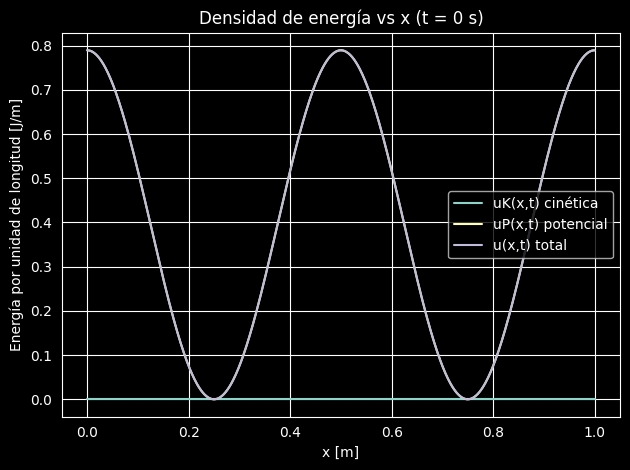

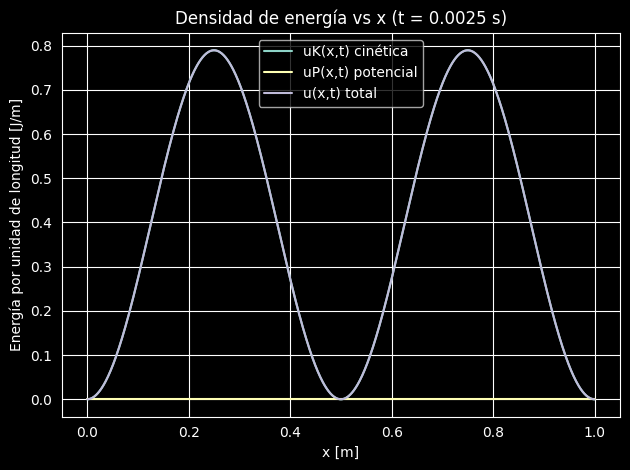

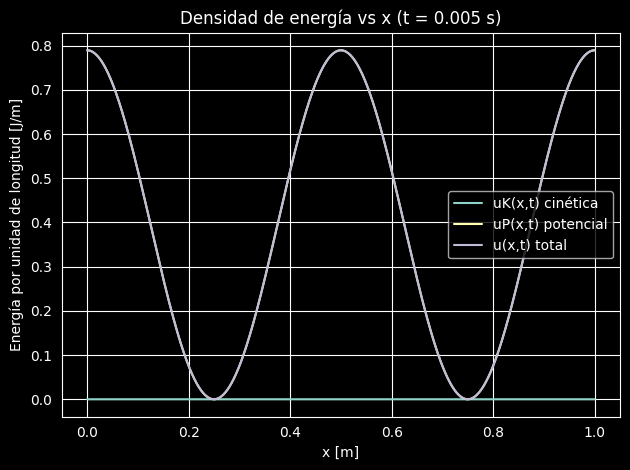

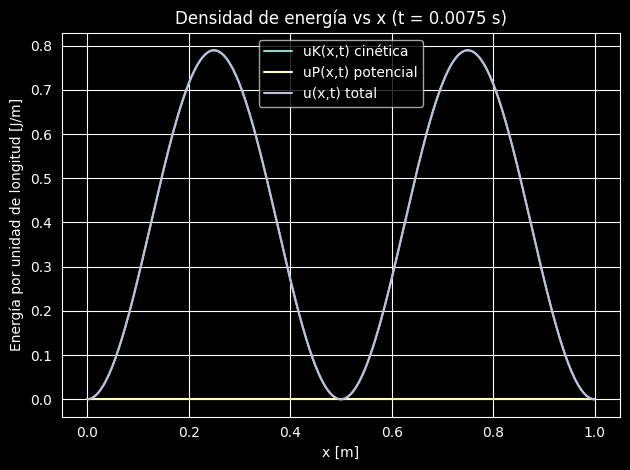

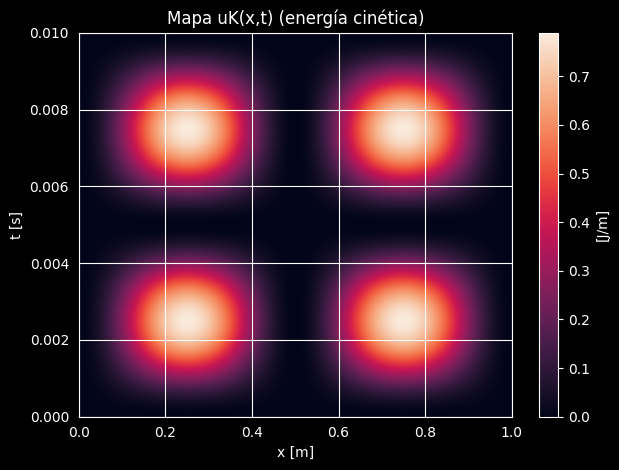

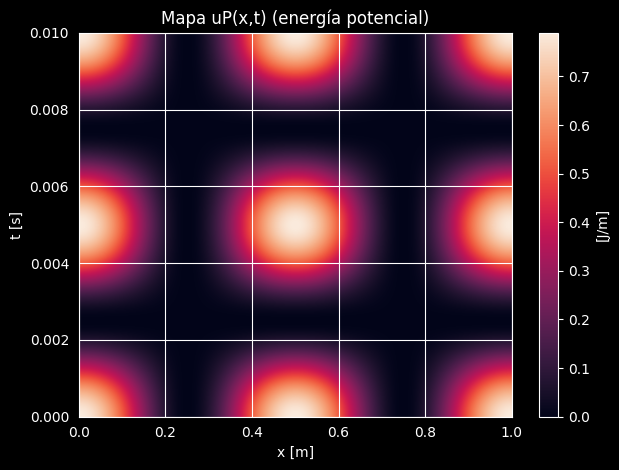

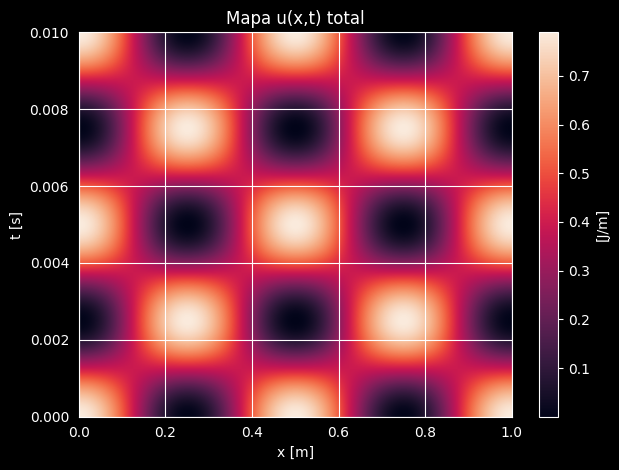

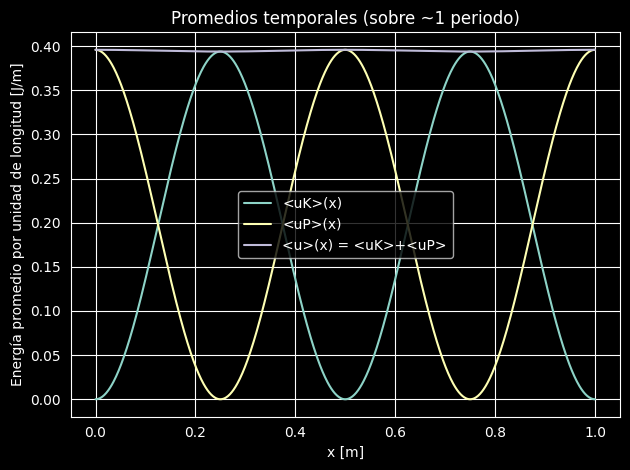

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
#  Energía en una ONDA ESTACIONARIA en una cuerda (extremos fijos)
#  y(x,t) = 2A sin(kx) cos(wt)
#
#  uK(x,t) = (1/2) * mu * (dy/dt)^2
#  uP(x,t) = (1/2) * T  * (dy/dx)^2
#
#  Parámetros: T (tensión), mu (densidad lineal), L (longitud), n (modo), A (amplitud)
# ============================================================

# --------- 1) Parámetros del problema (AJUSTA ESTO) ----------
T = 100.0        # tensión [N]
mu = 0.01        # densidad lineal [kg/m]
L = 1.0          # longitud [m]
n = 2            # modo (1,2,3,...)
A = 0.01         # amplitud [m]  (OJO: en y=2A sin(kx)cos(wt), la amplitud máxima es 2A)

# --------- 2) Parámetros de la onda ----------
v = np.sqrt(T / mu)           # rapidez de onda [m/s]
k = n * np.pi / L             # número de onda [rad/m]
w = v * k                     # frecuencia angular [rad/s]
periodo = 2 * np.pi / w       # periodo [s]
f = w / (2 * np.pi)           # frecuencia [Hz]

print("=== Parámetros ===")
print(f"v = {v:.6g} m/s")
print(f"k = {k:.6g} rad/m")
print(f"omega = {w:.6g} rad/s")
print(f"f = {f:.6g} Hz")
print(f"Periodo = {periodo:.6g} s")

# --------- 3) Mallas de x y t ----------
Nx = 800
Nt = 400
x = np.linspace(0, L, Nx)
t = np.linspace(0, periodo, Nt)

# Para campos 2D:
TT, XX = np.meshgrid(t, x, indexing="ij")  # TT y XX tienen forma (Nt, Nx)

# --------- 4) Onda estacionaria y derivadas analíticas ----------
# y(x,t) = 2A sin(kx) cos(wt)
y = 2 * A * np.sin(k * XX) * np.cos(w * TT)

# dy/dt = -2A w sin(kx) sin(wt)
dydt = -2 * A * w * np.sin(k * XX) * np.sin(w * TT)

# dy/dx = 2A k cos(kx) cos(wt)
dydx = 2 * A * k * np.cos(k * XX) * np.cos(w * TT)

# --------- 5) Densidades de energía ----------
uK = 0.5 * mu * (dydt ** 2)   # cinética [J/m]
uP = 0.5 * T  * (dydx ** 2)   # potencial [J/m]
uT = uK + uP                  # total [J/m]

# --------- 6) Promedios temporales (sobre un periodo muestreado) ----------
uK_avg = uK.mean(axis=0)  # promedio en t -> función de x
uP_avg = uP.mean(axis=0)
uT_avg = uT.mean(axis=0)

# --------- 7) GRÁFICAS 1: cortes en x para tiempos específicos ----------
tiempos = [0.0, periodo/4, periodo/2, 3*periodo/4]
idx = [np.argmin(np.abs(t - ti)) for ti in tiempos]

for ti, ii in zip(tiempos, idx):
    plt.figure()
    plt.plot(x, uK[ii, :], label="uK(x,t) cinética")
    plt.plot(x, uP[ii, :], label="uP(x,t) potencial")
    plt.plot(x, uT[ii, :], label="u(x,t) total")
    plt.title(f"Densidad de energía vs x (t = {ti:.3g} s)")
    plt.xlabel("x [m]")
    plt.ylabel("Energía por unidad de longitud [J/m]")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

# --------- 8) GRÁFICAS 2: mapas (x,t) tipo heatmap ----------
# Nota: extent = [xmin, xmax, tmin, tmax]
extent = [0, L, 0, periodo]

plt.figure()
plt.imshow(uK, aspect="auto", origin="lower", extent=extent)
plt.title("Mapa uK(x,t) (energía cinética)")
plt.xlabel("x [m]")
plt.ylabel("t [s]")
plt.colorbar(label="[J/m]")
plt.tight_layout()

plt.figure()
plt.imshow(uP, aspect="auto", origin="lower", extent=extent)
plt.title("Mapa uP(x,t) (energía potencial)")
plt.xlabel("x [m]")
plt.ylabel("t [s]")
plt.colorbar(label="[J/m]")
plt.tight_layout()

plt.figure()
plt.imshow(uT, aspect="auto", origin="lower", extent=extent)
plt.title("Mapa u(x,t) total")
plt.xlabel("x [m]")
plt.ylabel("t [s]")
plt.colorbar(label="[J/m]")
plt.tight_layout()

# --------- 9) GRÁFICAS 3: promedios temporales vs x ----------
plt.figure()
plt.plot(x, uK_avg, label="<uK>(x)")
plt.plot(x, uP_avg, label="<uP>(x)")
plt.plot(x, uT_avg, label="<u>(x) = <uK>+<uP>")
plt.title("Promedios temporales (sobre ~1 periodo)")
plt.xlabel("x [m]")
plt.ylabel("Energía promedio por unidad de longitud [J/m]")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()
